In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import csv
import matplotlib.pyplot as plt

In [2]:
# Se cargan los nombres de los archivos
filename_actividad = "logP_act.csv"
filename_param = "mediciones_kath.csv"

# Lectura de los archivos con pandas
df_actividad = pd.read_csv(filename_actividad)
df_param = pd.read_csv(filename_param)

# Se ordenan los archivos por código en orden alfabético
df_actividad.sort_values(by=['Codigo']).to_csv(filename_actividad, index=False)
df_param.sort_values(by=['Codigo']).to_csv(filename_param, index=False)

In [3]:
# Se evalua si alguno de los archivos es más grande que el otro para limpiar los datos que no tienen par
if (len(df_param) > len(df_actividad)):
    print("reduciendo file_param")
    list_to_reduce = df_param
    list_to_compare = df_actividad
    csv_to_reduce = filename_param
else:
    print("reduciendo file_act")
    list_to_reduce = df_actividad
    list_to_compare = df_param
    csv_to_reduce = filename_activida

# Se extraen los índices de las filas en las cuales no se tienen los datos necesarios    
mutual_compound_idx = []
for i, k in enumerate(list_to_reduce['Codigo']):
    if k in list(list_to_compare['Codigo']):
        mutual_compound_idx.append(i+1)



reduciendo file_param


In [4]:
# Se inicializa una lista para ler un archivo de txt (csv en este caso)
lines = list()

with open(csv_to_reduce, 'r') as readFile:
    reader = csv.reader(readFile)
    for idx, row in enumerate(reader):
        if idx in mutual_compound_idx or idx == 0: # Revisamos si el indice está en la lista de mutuals y guardamos
            lines.append(row)

# Escritura
with open("clean_data.csv", 'w') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(lines)

In [6]:
#Cargamos el csv que redujimos 

df_reduced = pd.read_csv(csv_to_reduce)
reduced_cols = np.asarray(df_reduced.columns)

# Cargamos el csv que escribirmos antes en un df
df_clean = pd.read_csv("clean_data.csv")
clean_cols = np.asarray(list_to_compare.columns)
#print(compared_cols)
common = np.intersect1d(reduced_cols, clean_cols)

df_full = pd.DataFrame(df_clean)

# Se itera sobre la lista de datos limpios y se revisa si el dato ya se añadió antes
for j in clean_cols:
    if j not in common:
        df_full[j] = list_to_compare[j]
        
df_full.to_csv("full_data.csv")

In [7]:
df_full

Codigo  MasaMolar(g-mol)  pKafenolCRC  angulo5-6-7-8  angulo6-7-8-9  \
0   CRQ-087          295.2464         7.15         -31.28         130.03   
1   CRQ-135          326.3448         9.55         -32.72         132.05   
2   CRQ-136          486.9370         5.90        -119.91        -159.15   
3   CRQ-150          280.2748        10.21         -38.53         135.55   
4   CRQ-151          284.6939         8.56        -128.55        -154.98   
5   CRQ-152          284.6939         9.12          86.24           1.57   
6   CRQ-153          284.6939         9.41        -149.05        -133.23   
7   CRQ-154          306.3551        10.23          75.99           3.56   
8   CRQ-155          280.2748         9.65          87.98           1.82   
9   CRQ-156          280.2748         9.98        -108.67           6.00   
10  CRQ-157          250.2488         9.99          79.52           2.68   
11  CRQ-158          295.2464         7.23         117.23         168.33   
12  CRQ-159          295.2464         8.36         -85.06          -2.09   
13  CRQ-161          280.2748        10.26          88.86           0.67   
14  CRQ-162          280.2748        10.09          95.06          -1.05   
15  CRQ-164          329.1449         8.45        -126.48        -156.41   
16  CRQ-165          329.1449         9.37        -149.07        -133.27   
17  CRQ-166          492.5633          NaN          94.63          -0.86   
18  CRQ-167          408.0409         7.79          39.70        -134.81   
19  CRQ-168          319.1389         7.83          40.36        -135.40   
20  CRQ-169          353.5840         6.15          65.27        -156.90   
21  CRQ-170          353.5840         6.15        -129.56        -154.05   
22  CRQ-171          319.1389         6.97        -149.64        -132.39   
23  CRQ-172          312.7470          NaN          88.13           0.80   
24  CRQ-173          306.3551        11.11          85.79           0.95   
25  CRQ-174          443.7065         7.90          27.92        -132.08   
26  CRQ-175          320.3386        10.72         107.84          -6.57   

    angulo6-7-8  Enlace6–7(pm)  Enlace7-8(pm)  LogPow  S_aureus   E_coli  \
0        120.34         136.74         135.16    2.06    212.00  3387.00   
1        120.29         137.76         134.52    3.98   3064.00  3064.00   
2        124.40         136.47         134.88    4.46   2450.00  2450.00   
3        119.83         138.39         134.25    2.64   1784.00  3568.00   
4        124.08         137.49         134.53    3.17    220.00  3512.00   
5        118.97         138.16         133.86    3.18    878.00  3512.00   
6        120.24         137.73         134.62    3.19    439.00  3512.00   
7        119.50         138.51         133.50    3.86   3264.00  3264.00   
8        118.93         138.51         133.57    2.64    223.00  3568.00   
9        119.33         137.93         133.65    2.62   3568.00   892.00   
10       119.29         138.44         133.60    2.65    250.00   250.00   
11       126.15         136.84         134.67    2.01     13.00  1693.00   
12       119.09         137.78         134.13    2.06     21.20  3387.00   
13       118.83         138.62         133.55    2.98    237.00  3784.00   
14       118.88         138.62         133.54    2.98    431.00  1722.00   
15       124.33         137.52         134.53    3.26    760.00  3038.00   
16       120.08         137.67         134.67    3.27   3038.00  3038.00   
17       118.82         138.51         133.57    6.49   2030.00  2030.00   
18       120.03         136.84         134.83    3.87   2450.00  2450.00   
19       120.19         136.90         134.76    3.69   2828.00  2828.00   
20       124.10         136.47         134.86    4.20   2828.00  2828.00   
21       123.83         137.04         134.91    4.23   2828.00  2828.00   
22       120.22         137.40         134.86    3.70   3133.00  3133.00   
23       118.97         138.48         133.64    3.8

           4             3             2
1.823e-11 x - 1.617e-07 x + 0.0004335 x - 0.338 x + 345.6


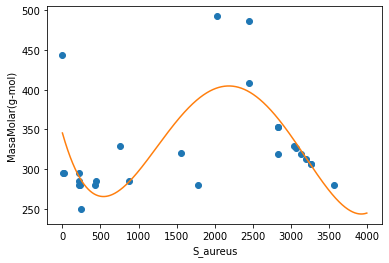

     4       3       2
nan x + nan x + nan x + nan x + nan


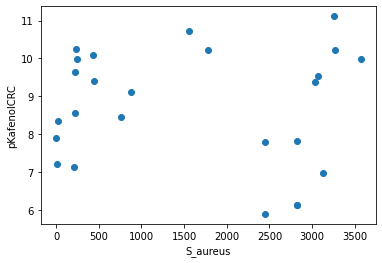

           4             3             2
1.074e-11 x - 8.018e-08 x + 0.0001826 x - 0.1323 x + 25.88


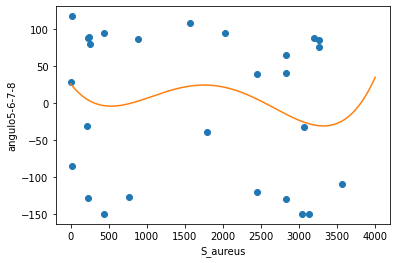

           4            3             2
3.473e-11 x - 2.27e-07 x + 0.0004621 x - 0.3201 x + 25.38


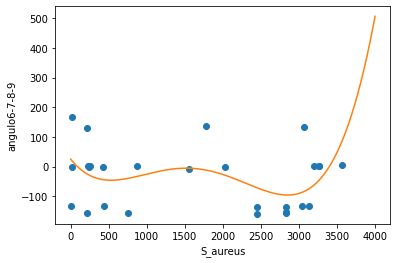

          4             3             2
-1.3e-13 x + 6.965e-11 x + 2.328e-06 x - 0.004327 x + 121.7


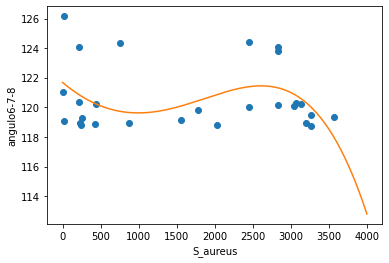

           4            3             2
3.557e-11 x - 3.11e-07 x + 0.0008662 x - 0.7896 x + 431.6


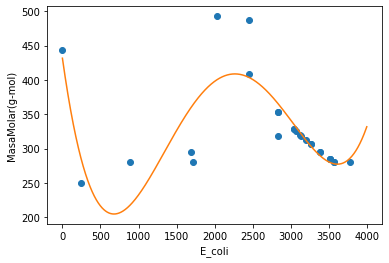

     4       3       2
nan x + nan x + nan x + nan x + nan


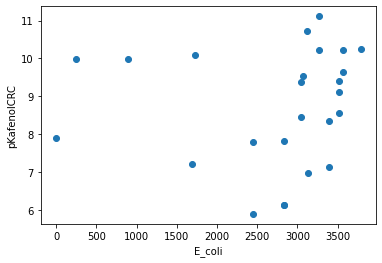

           4             3             2
2.934e-11 x - 2.182e-07 x + 0.0005066 x - 0.3806 x + 64.87


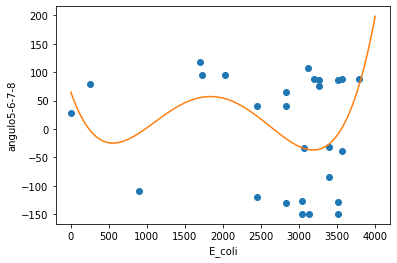

            4             3             2
-1.523e-11 x + 1.698e-07 x - 0.0005883 x + 0.67 x - 141.5


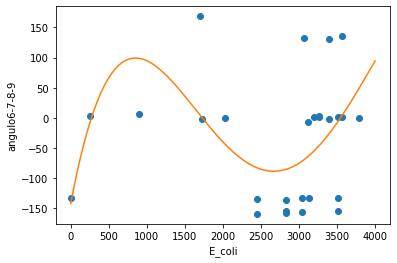

           4             3             2
3.985e-13 x - 3.563e-09 x + 9.748e-06 x - 0.007881 x + 120.9


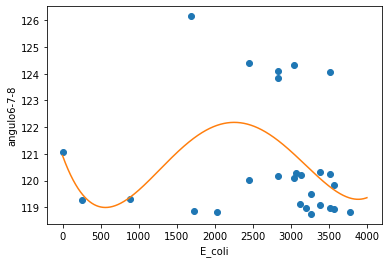

           4             3             2
2.018e-11 x - 1.753e-07 x + 0.0004584 x - 0.3436 x + 348.4


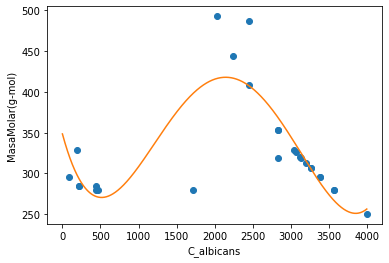

     4       3       2
nan x + nan x + nan x + nan x + nan


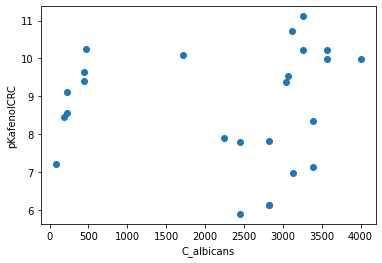

           4             3             2
1.295e-11 x - 8.976e-08 x + 0.0001728 x - 0.06773 x + 3.156


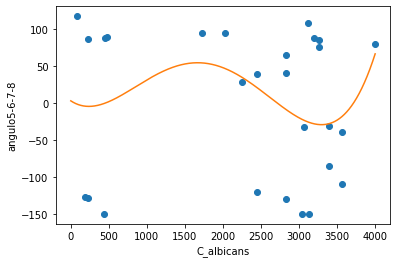

            4             3             2
-7.649e-12 x + 6.686e-08 x - 0.0001535 x + 0.06179 x - 36.57


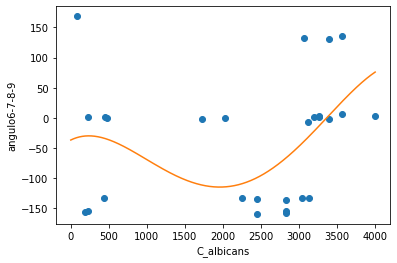

           4             3             2
9.367e-13 x - 9.026e-09 x + 2.877e-05 x - 0.03297 x + 128.6


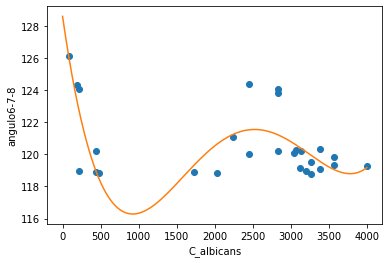

In [8]:
# Variables de interes, es decir las bacterias (eje x)

interest_vars = ["S_aureus", "E_coli", "C_albicans"]
data_columns = df_full.columns[1:6]
space = np.linspace(0, 4000, 4000)

# Regresion polinomial de cualquier grado
for i in interest_vars:
    for j in data_columns:
        ajuste = np.polyfit(df_full[i], df_full[j], 4)
        p = np.poly1d(ajuste)
        print(p)
        plt.figure()
        plt.plot(df_full[i], df_full[j], 'o', label='original data')
        plt.plot(space, p(space), '-')
        plt.xlabel(i)
        plt.ylabel(j)
        plt.show()
    
    

0.009148649722545872


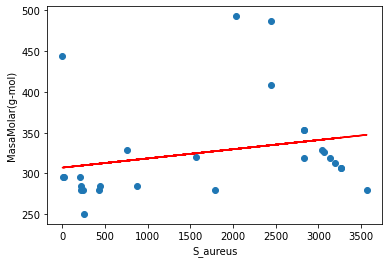

nan


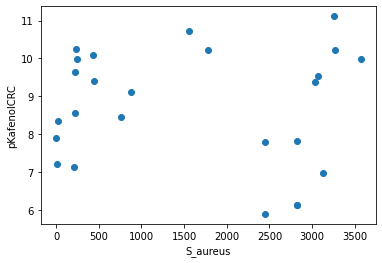

0.01481756585131198


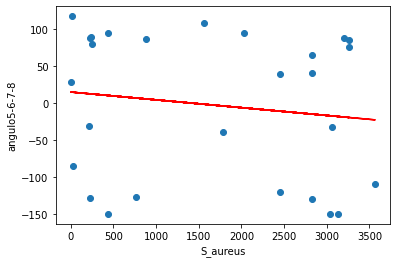

0.015231228276375379


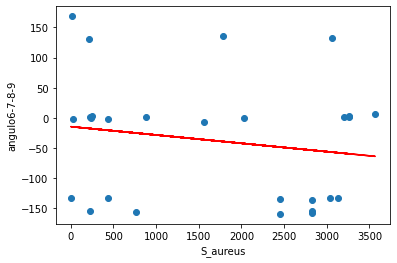

0.00033090136291298193


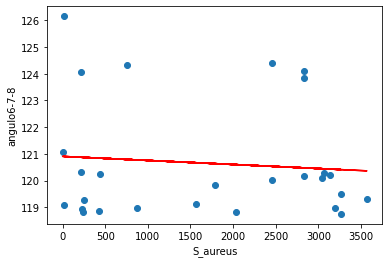

0.0119139675880223


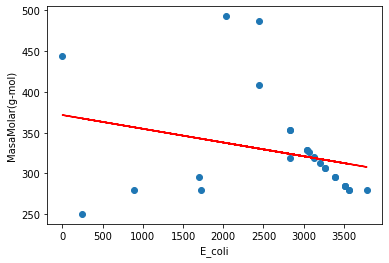

nan


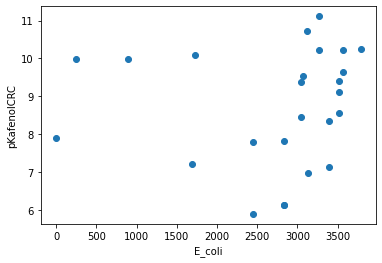

0.019411157408938427


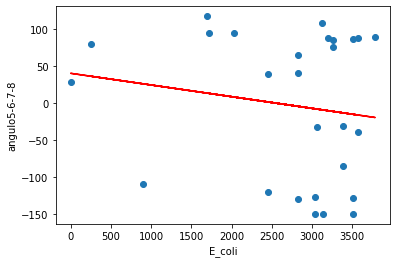

0.020332358645340474


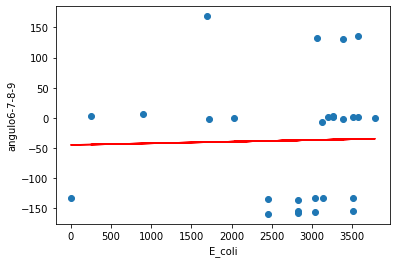

0.0004350915611665106


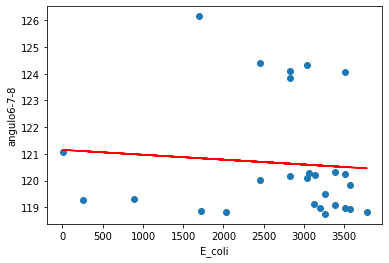

0.009651872857252107


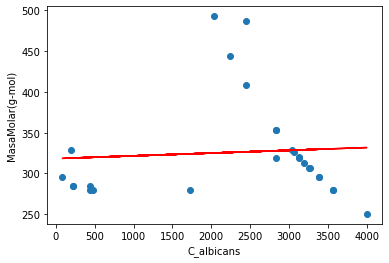

nan


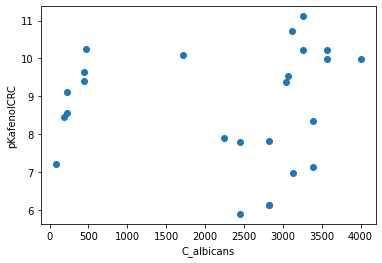

0.015347961116775515


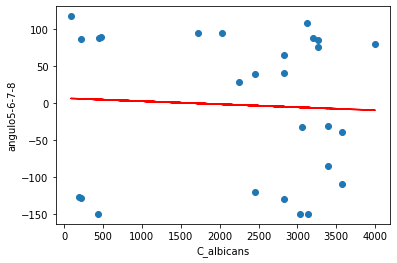

0.01576564173849439


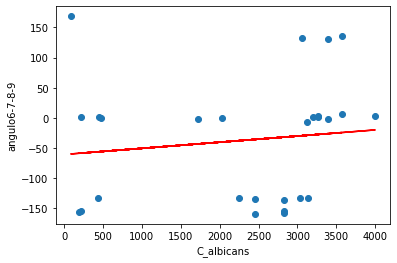

0.00032116005697158974


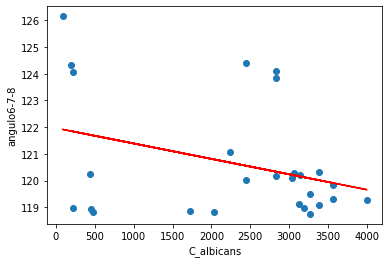

In [9]:
# Regresion lineal
for i in interest_vars:
    for j in data_columns:
        slope, intercept, r_value, p_value, std_err = stats.linregress(df_full[i].tolist(), df_full[j].tolist())
        print(std_err)
        plt.figure()
        plt.plot(df_full[i], df_full[j], 'o', label='original data')
        plt.plot(df_full[i], intercept + slope*df_full[i], 'r', label='fitted line')
        plt.xlabel(i)
        plt.ylabel(j)
        plt.show()

0.009148649722545872


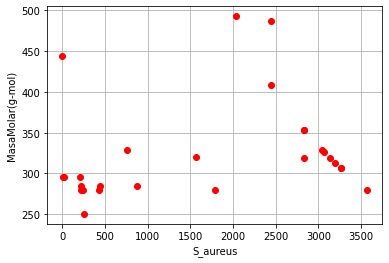

nan


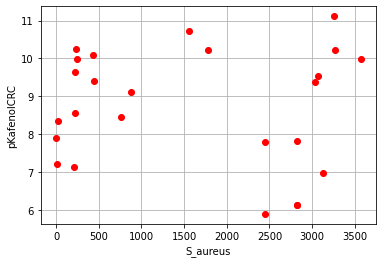

0.01481756585131198


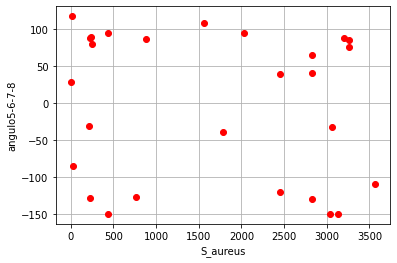

0.015231228276375379


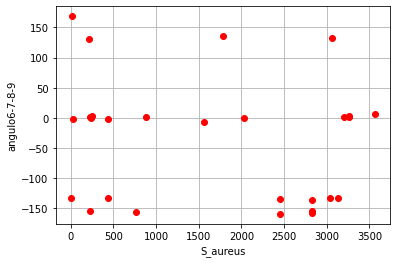

0.00033090136291298193


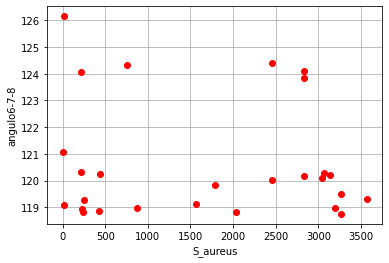

0.0119139675880223


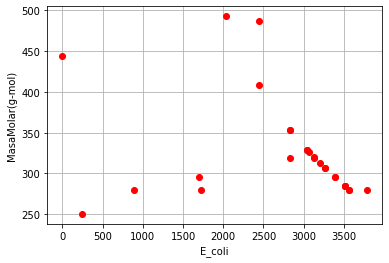

nan


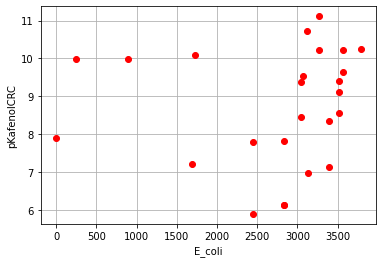

0.019411157408938427


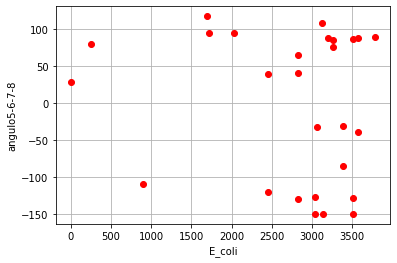

0.020332358645340474


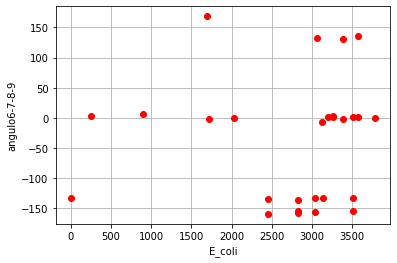

0.0004350915611665106


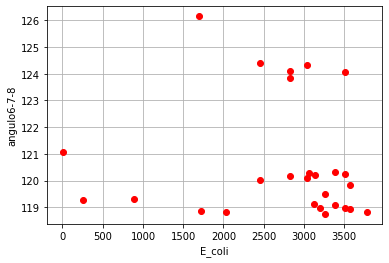

0.009651872857252107


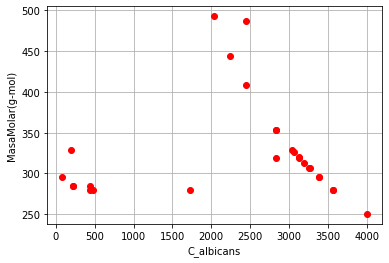

nan


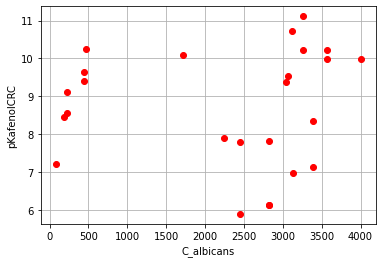

0.015347961116775515


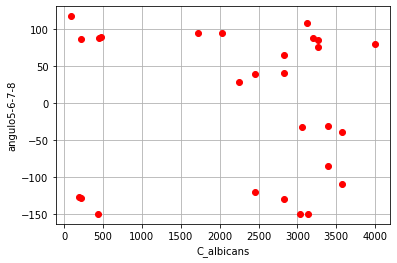

0.01576564173849439


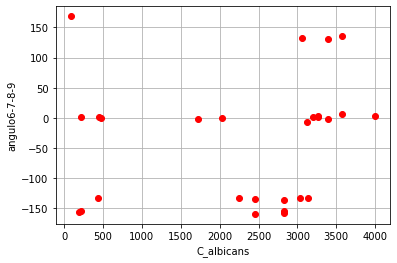

0.00032116005697158974


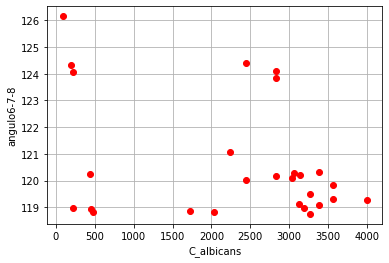

In [10]:
#Obtener puntos graficados en 2D

for i in interest_vars:
    for j in data_columns:
        slope, intercept, r_value, p_value, std_err = stats.linregress(df_full[i].tolist(), df_full[j].tolist())
        print(std_err)
        plt.figure()
        plt.plot(df_full[i], df_full[j], 'ro', label='original data')
        #plt.plot(df_full[i], intercept + slope*df_full[i], 'r', label='fitted line')
        plt.xlabel(i)
        plt.ylabel(j)
        plt.grid()
        plt.show()
        #plt.savefig(f"graph_actividad_vs_param/{i}_{j}")

#for j in range(3, len(act)):
#    listaA = [df_actividad[act[j]][i] for i in range(len(mutual_compound_idx))]
    #print(act[j], "\n",listaA)
#    for k in range(1, len(params)):
#        listaB = [df_param[params[k]][i] for i in mutual_compound_idx]
#        #print(params[k], listaB)
#        plt.figure()
#        plt.plot(listaA, listaB, 'ro')
#        plt.xlabel(act[j])
#        plt.ylabel(params[k])
#        plt.grid()
#        plt.savefig(f"graph_actividad_vs_param/{act[j]}_{params[k]}")
    

In [11]:
# Hallamos la correlacion de pearson entre todos los datos

df_full.iloc[:, 1:].corr(method='pearson')

MasaMolar(g-mol)  pKafenolCRC  angulo5-6-7-8  angulo6-7-8-9  \
MasaMolar(g-mol)          1.000000    -0.582034      -0.048048      -0.386757   
pKafenolCRC              -0.582034     1.000000       0.339078       0.410764   
angulo5-6-7-8            -0.048048     0.339078       1.000000       0.442952   
angulo6-7-8-9            -0.386757     0.410764       0.442952       1.000000   
angulo6-7-8               0.242392    -0.703665      -0.328460      -0.296453   
Enlace6–7(pm)            -0.432982     0.896459       0.360903       0.401328   
Enlace7-8(pm)             0.338569    -0.831544      -0.545181      -0.381205   
LogPow                    0.824500    -0.262683       0.099570      -0.411760   
S_aureus                  0.239024    -0.058850      -0.140594      -0.178230   
E_coli                   -0.271855     0.080866      -0.160368       0.026625   
C_albicans                0.070002     0.034348      -0.052880       0.127868   

                  angulo6-7-8  Enlace6–7(pm)  Enlace7-8(pm)    LogPow  \
MasaMolar(g-mol)     0.242392      -0.432982       0.338569  0.824500   
pKafenolCRC         -0.703665       0.896459      -0.831544 -0.262683   
angulo5-6-7-8       -0.328460       0.360903      -0.545181  0.099570   
angulo6-7-8-9       -0.296453       0.401328      -0.381205 -0.411760   
angulo6-7-8          1.000000      -0.694647       0.629011  0.015724   
Enlace6–7(pm)       -0.694647       1.000000      -0.910788 -0.107214   
Enlace7-8(pm)        0.629011      -0.910788       1.000000  0.075041   
LogPow               0.015724      -0.107214       0.075041  1.000000   
S_aureus            -0.091216       0.002065      -0.005290  0.392419   
E_coli              -0.083770       0.184683      -0.020192 -0.223154   
C_albicans          -0.337970       0.012436      -0.017427  0.101241   

                  S_aureus    E_coli  C_albicans  
MasaMolar(g-mol)  0.239024 -0.271855    0.070002  
pKafenolCRC      -0.058850  0.080866    0.034348  
angulo5-6-7-8    -0.140594 -0.160368   -0.052880  
angulo6-7-8-9    -0.178230  0.026625    0.127868  
angulo6-7-8      -0.091216 -0.083770   -0.337970  
Enlace6–7(pm)     0.002065  0.184683    0.012436  
Enlace7-8(pm)    -0.005290 -0.020192   -0.017427  
LogPow            0.392419 -0.223154    0.101241  
S_aureus          1.000000  0.097818    0.564718  
E_coli            0.097818  1.000000   -0.208285  
C_albicans        0.564718 -0.208285    1.000000

In [12]:
# Hallamos la correlacion de spearman entre todos los datos

df_full.iloc[:, 1:].corr(method='spearman')

MasaMolar(g-mol)  pKafenolCRC  angulo5-6-7-8  angulo6-7-8-9  \
MasaMolar(g-mol)          1.000000    -0.577134      -0.191413      -0.557062   
pKafenolCRC              -0.577134     1.000000       0.423158       0.491248   
angulo5-6-7-8            -0.191413     0.423158       1.000000       0.427350   
angulo6-7-8-9            -0.557062     0.491248       0.427350       1.000000   
angulo6-7-8               0.388714    -0.748606      -0.526942      -0.376736   
Enlace6–7(pm)            -0.528332     0.902214       0.473033       0.475783   
Enlace7-8(pm)             0.501232    -0.890493      -0.571778      -0.441967   
LogPow                    0.819710    -0.259815      -0.092839      -0.487097   
S_aureus                  0.271683     0.114748      -0.192760      -0.043990   
E_coli                   -0.402583     0.323887      -0.091437       0.150459   
C_albicans               -0.131451     0.229243      -0.139670       0.352384   

                  angulo6-7-8  Enlace6–7(pm)  Enlace7-8(pm)    LogPow  \
MasaMolar(g-mol)     0.388714      -0.528332       0.501232  0.819710   
pKafenolCRC         -0.748606       0.902214      -0.890493 -0.259815   
angulo5-6-7-8       -0.526942       0.473033      -0.571778 -0.092839   
angulo6-7-8-9       -0.376736       0.475783      -0.441967 -0.487097   
angulo6-7-8          1.000000      -0.874389       0.813808  0.124618   
Enlace6–7(pm)       -0.874389       1.000000      -0.952454 -0.197187   
Enlace7-8(pm)        0.813808      -0.952454       1.000000  0.200611   
LogPow               0.124618      -0.197187       0.200611  1.000000   
S_aureus            -0.132600       0.148624      -0.134801  0.469438   
E_coli              -0.258144       0.341956      -0.243421 -0.309011   
C_albicans          -0.232157       0.150834      -0.101070 -0.067115   

                  S_aureus    E_coli  C_albicans  
MasaMolar(g-mol)  0.271683 -0.402583   -0.131451  
pKafenolCRC       0.114748  0.323887    0.229243  
angulo5-6-7-8    -0.192760 -0.091437   -0.139670  
angulo6-7-8-9    -0.043990  0.150459    0.352384  
angulo6-7-8      -0.132600 -0.258144   -0.232157  
Enlace6–7(pm)     0.148624  0.341956    0.150834  
Enlace7-8(pm)    -0.134801 -0.243421   -0.101070  
LogPow            0.469438 -0.309011   -0.067115  
S_aureus          1.000000 -0.089977    0.431259  
E_coli           -0.089977  1.000000   -0.034446  
C_albicans        0.431259 -0.034446    1.000000

         PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0   0.159139 -2.501395  0.875679  0.977285  1.551279  0.444172 -0.020771   
1  -0.165933  0.367762 -0.211800  1.731150  0.837871 -0.574819 -0.591151   
2   3.974236  0.853321  0.330374  0.085808  0.000590 -0.801340  0.945767   
3  -1.529161 -0.885124 -0.399733  0.955044  0.728958 -0.681786 -0.263413   
4   1.381588 -1.693220 -0.360442 -1.244889 -0.808452 -0.662312 -0.352462   
5  -1.675320 -0.076694  0.422650 -0.328261 -0.013740  0.427534 -0.120051   
6   0.625277 -1.183459 -0.985796 -1.360659  0.518319 -0.023033 -0.409763   
7  -1.598280  1.402711 -0.494773  0.638082 -0.661054 -0.078161 -0.040125   
8  -2.343758 -0.423844  0.472249 -0.791653 -0.143928  0.169311  0.240642   
9  -0.982367 -0.127835 -1.969612  0.848829  0.014214 -0.263418  0.665051   
10 -2.354050 -0.728497  0.319792 -0.718188 -0.342505  0.214977 -0.051642   
11  0.106494 -2.786243  2.570508  1.632374 -0.897665 -0.590922  0.086273   
12 -0.913306

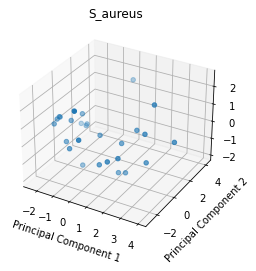

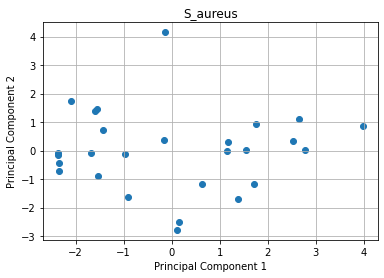

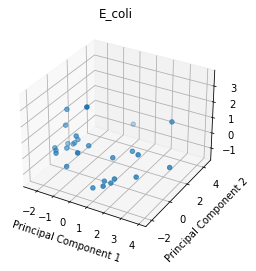

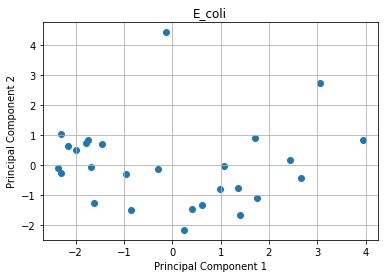

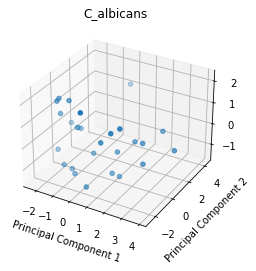

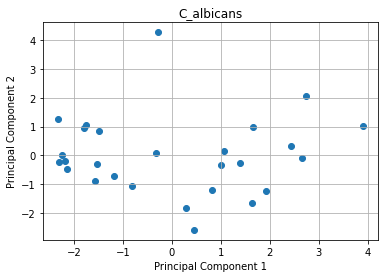

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# PCA
to_remove = [['pKafenolCRC', 'E_coli', 'C_albicans'], ['pKafenolCRC', 'C_albicans', 'S_aureus'],['pKafenolCRC', 'E_coli', 'S_aureus']]

for remove in to_remove:
    df_PCA = pd.read_csv("full_data.csv", index_col = 0)#.set_index("Codigo", inplace=True)
    
    # Se tuvo que eliminar el dato de pKafenol porque no está completo
    df_PCA = df_PCA.drop(remove, axis=1)
    df_PCA
    
    variables = df_PCA.columns
    #print(variables)

    #Normalizamos los datos
    x = df_PCA.loc[:, variables[1:]]#.values
    x = pd.DataFrame(x)
    y = df_PCA.loc[0]
    x = StandardScaler().fit_transform(x)
    x = pd.DataFrame(x)

    pca = PCA()
    x_pca = pca.fit_transform(x)
    x_pca = pd.DataFrame(x_pca)
    
    

    explained_variance = pca.explained_variance_ratio_

    x_pca.columns = [''.join(["PC", str(i)]) for i in range(len(variables)-1)]
    print(x_pca)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel("Principal Component 1") 
    ax.set_ylabel("Principal Component 2") 
    ax.set_title(variables[-1]) 
    ax.scatter(x_pca["PC0"], x_pca["PC1"], x_pca["PC2"])
    ax.grid()
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel("Principal Component 1") 
    ax1.set_ylabel("Principal Component 2") 
    ax1.set_title(variables[-1]) 
    ax1.scatter(x_pca["PC0"], x_pca["PC1"])
    ax1.grid()

In [68]:
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

explained_variance = pca.explained_variance_ratio_
explained_variance

x_pca.columns = [''.join(["PC", str(i)]) for i in range(len(variables)-1)]
x_pca.head()

PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0  0.288129 -1.841283 -1.505129  1.852942 -0.157250  0.965354  0.023334   
1 -0.316733  0.092437 -0.790678  1.074263 -1.171273  0.299026 -0.671150   
2  3.893324  1.033168 -0.012455  0.205748 -0.650902 -0.469575  0.959061   
3 -1.575090 -0.883408 -1.271123  0.650982 -0.947026 -0.060974 -0.258363   
4  1.634897 -1.653602  1.229570 -1.338377 -0.183607 -0.513962 -0.277330   

        PC7  
0  0.000083  
1  0.180312  
2 -0.068204  
3 -0.338665  
4  0.095519

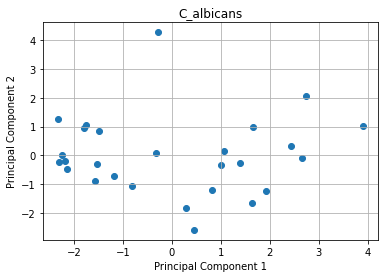

In [67]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("Principal Component 1") 
ax.set_ylabel("Principal Component 2") 
ax.set_title(variables[-1]) 
ax.scatter(x_pca["PC0"], x_pca["PC1"])
ax.grid()